# Classification with Perceptron

In this lab, you will use a single perceptron neural network model to solve a simple classification problem. 

# Table of Contents

- [ 1 - Simple Classification Problem](#1)
- [ 2 - Single Perceptron Neural Network with Activation Function](#2)
  - [ 2.1 - Neural Network Structure](#2.1)
  - [ 2.2 - Dataset](#2.2)
  - [ 2.3 - Define Activation Function](#2.3)
- [ 3 - Implementation of the Neural Network Model](#3)
  - [ 3.1 - Defining the Neural Network Structure](#3.1)
  - [ 3.2 - Initialize the Model's Parameters](#3.2)
  - [ 3.3 - The Loop](#3.3)
  - [ 3.4 - Integrate parts 3.1, 3.2 and 3.3 in nn_model() and make predictions](#3.4)
- [ 4 - Performance on a Larger Dataset](#4)

## Packages

Let's first import all the packages that you will need during this lab.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
# A function to create a dataset.
from sklearn.datasets import make_blobs 

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3)

<a name='1'></a>
## 1 - Simple Classification Problem

**Classification** is the problem of identifying which of a set of categories an observation belongs to. In case of only two categories it is called a **binary classification problem**. Let's see a simple example of it.

Imagine that you have a set of sentences which you want to classify as "happy" and "angry". And you identified that the sentences contain only two words: *aack* and *beep*. For each of the sentences (data point in the given dataset) you count the number of those two words ($x_1$ and $x_2$) and compare them with each other. If there are more "beep" ($x_2 > x_1$), the sentence should be classified as "angry", if not ($x_2 <= x_1$), it is a "happy" sentence. Which means that there will be some straight line separating those two classes.

Let's take a very simple set of $4$ sentenses: 
- "Beep!" 
- "Aack?" 
- "Beep aack..." 
- "!?"

Here both $x_1$ and $x_2$ will be either $0$ or $1$. You can plot those points in a plane, and see the points (observations) belong to two classes, "angry" (red) and "happy" (blue), and a straight line can be used as a decision boundary to separate those two classes. An example of such a line is plotted. 

[]

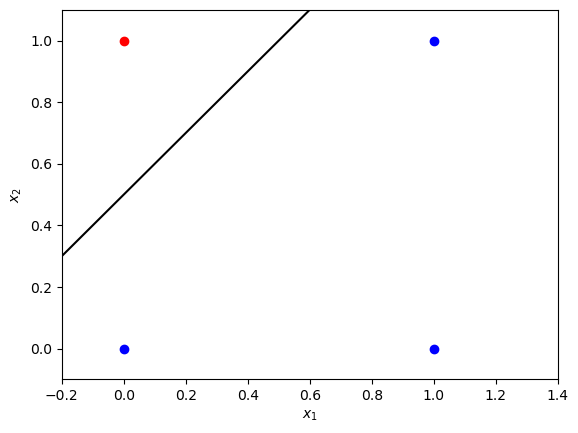

In [2]:
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
x_line = np.arange(xmin, xmax, 0.1)
# Data points (observations) from two classes.
ax.scatter(0, 0, color="b")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="b")
ax.scatter(1, 1, color="b")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
# One of the lines which can be used as a decision boundary to separate two classes.
ax.plot(x_line, x_line + 0.5, color="black")
plt.plot()

This particular line is chosen using common sense, just looking at the visual representation of the observations. Such classification problem is called a problem with **two linearly separable classes**.

The line $x_1-x_2+0.5 = 0$ (or $x_2 = x_1 + 0.5$) can be used as a separating line for the problem. All of the points $(x_1, x_2)$ above this line, such that $x_1-x_2+0.5 < 0$ (or $x_2 > x_1 + 0.5$), will be considered belonging to the red class, and below this line $x_1-x_2+0.5 > 0$ ($x_2 < x_1 + 0.5$) - belonging to the blue class. So the problem can be rephrased: in the expression $w_1x_1+w_2x_2+b=0$ find the values for the parameters $w_1$, $w_2$ and the threshold $b$, so that the line can serve as a decision boundary.

In this simple example you could solve the problem of finding the decision boundary just looking at the plot: $w_1 = 1$, $w_2 = -1$, $b = 0.5$. But what if the problem is more complicated? You can use a simple neural network model to do that! Let's implement it for this example and then try it for more complicated problem.

<a name='2'></a>
## 2 - Single Perceptron Neural Network with Activation Function

You already have constructed and trained a neural network model with one **perceptron**. Here a similar model can be used, but with an activation function. Then a single perceptron basically works as a threshold function.

<a name='2.1'></a>
### 2.1 - Neural Network Structure

The neural network components are shown in the following scheme:

<img src="images/nn_model_classification_1_layer.png" style="width:600px;">

Similarly to the previous lab, the input layer contains two nodes $x_1$ and $x_2$. Weight vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$ and bias ($b$) are the parameters to be updated during the model training. First step in the forward propagation is the same as in the previous lab. For every training example $x^{(i)} = \begin{bmatrix} x_1^{(i)} & x_2^{(i)}\end{bmatrix}$:

$$z^{(i)} = w_1x_1^{(i)} + w_2x_2^{(i)} + b = Wx^{(i)} + b.\tag{1}$$


But now you cannot take a real number $z^{(i)}$ into the output as you need to perform classification. It could be done with a discrete approach: compare the result with zero, and classify as $0$ (blue) if it is below zero and $1$ (red) if it is above zero. Then define cost function as a percentage of incorrectly identified classes and perform backward propagation.

This extra step in the forward propagation is actually an application of an **activation function**. It would be possible to implement the discrete approach described above (with unit step function) for this problem, but it turns out that there is a continuous approach that works better and is commonly used in more complicated neural networks. So you will implement it here: single perceptron with sigmoid activation function.

Sigmoid activation function is defined as

$$a = \sigma\left(z\right) = \frac{1}{1+e^{-z}}.\tag{2}$$

Then a threshold value of $0.5$ can be used for predictions: $1$ (red) if  $a > 0.5$ and $0$ (blue) otherwise. Putting it all together, mathematically the single perceptron neural network with sigmoid activation function can be expressed as:

\begin{align}
z^{(i)} &=  W x^{(i)} + b,\\
a^{(i)} &= \sigma\left(z^{(i)}\right).\\\tag{3}
\end{align}

If you have $m$ training examples organised in the columns of ($2 \times m$) matrix $X$, you can apply the activation function element-wise. So the model can be written as:

\begin{align}
Z &=  W X + b,\\
A &= \sigma\left(Z\right),\\\tag{4}
\end{align}

where $b$ is broadcasted to the vector of a size ($1 \times m$). 

When dealing with classification problems, the most commonly used cost function is the **log loss**, which is described by the following equation:

$$\mathcal{L}\left(W, b\right) = \frac{1}{m}\sum_{i=1}^{m} L\left(W, b\right) = \frac{1}{m}\sum_{i=1}^{m}  \large\left(\small -y^{(i)}\log\left(a^{(i)}\right) - (1-y^{(i)})\log\left(1- a^{(i)}\right)  \large  \right) \small,\tag{5}$$

where $y^{(i)} \in \{0,1\}$ are the original labels and $a^{(i)}$ are the continuous output values of the forward propagation step (elements of array $A$).

You want to minimize the cost function during the training. To implement gradient descent, calculate partial derivatives using chain rule:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial w_1 } &= 
\frac{1}{m}\sum_{i=1}^{m} \frac{\partial L }{ \partial a^{(i)}}
\frac{\partial a^{(i)} }{ \partial z^{(i)}}\frac{\partial z^{(i)} }{ \partial w_1},\\
\frac{\partial \mathcal{L} }{ \partial w_2 } &= 
\frac{1}{m}\sum_{i=1}^{m} \frac{\partial L }{ \partial a^{(i)}}
\frac{\partial a^{(i)} }{ \partial z^{(i)}}\frac{\partial z^{(i)} }{ \partial w_2},\tag{6}\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \frac{\partial L }{ \partial a^{(i)}}
\frac{\partial a^{(i)} }{ \partial z^{(i)}}\frac{\partial z^{(i)} }{ \partial b}.
\end{align}

As discussed in the videos, $\frac{\partial L }{ \partial a^{(i)}}
\frac{\partial a^{(i)} }{ \partial z^{(i)}} = \left(a^{(i)} - y^{(i)}\right)$, $\frac{\partial z^{(i)}}{ \partial w_1} = x_1^{(i)}$, $\frac{\partial z^{(i)}}{ \partial w_2} = x_2^{(i)}$ and $\frac{\partial z^{(i)}}{ \partial b} = 1$. Then $(6)$ can be rewritten as:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial w_1 } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(a^{(i)} - y^{(i)}\right)x_1^{(i)},\\
\frac{\partial \mathcal{L} }{ \partial w_2 } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(a^{(i)} - y^{(i)}\right)x_2^{(i)},\tag{7}\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(a^{(i)} - y^{(i)}\right).
\end{align}

Note that the obtained expressions $(7)$ are exactly the same as in the section $3.2$ of the previous lab, when multiple linear regression model was discussed. Thus, they can be rewritten in a matrix form:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W } &= 
\begin{bmatrix} \frac{\partial \mathcal{L} }{ \partial w_1 } & 
\frac{\partial \mathcal{L} }{ \partial w_2 }\end{bmatrix} = \frac{1}{m}\left(A - Y\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b } &= \frac{1}{m}\left(A - Y\right)\mathbf{1}.
\tag{8}
\end{align}

where $\left(A - Y\right)$ is an array of a shape ($1 \times m$), $X^T$ is an array of a shape ($m \times 2$) and $\mathbf{1}$ is just a ($m \times 1$) vector of ones.



Then you can update the parameters:

\begin{align}
W &= W - \alpha \frac{\partial \mathcal{L} }{ \partial W },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b },
\tag{9}\end{align}

where $\alpha$ is the learning rate. Repeat the process in a loop until the cost function stops decreasing.

Finally, the predictions for some example $x$ can be made taking the output $a$ and calculating $\hat{y}$ as

$$\hat{y} = \begin{cases} 1 & \mbox{if } a > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{10}$$

<a name='2.2'></a>
### 2.2 - Dataset

Let's get the dataset you will work on. The following code will create $m=30$ data points $(x_1, x_2)$, where $x_1, x_2 \in \{0,1\}$ and save them in the `NumPy` array `X` of a shape $(2 \times m)$ (in the columns of the array). The labels ($0$: blue, $1$: red) will be calculated so that $y = 1$ if $x_1 = 0$ and $x_2 = 1$, in the rest of the cases $y=0$. The labels will be saved in the array `Y` of a shape $(1 \times m)$.

In [3]:
m = 30

X = np.random.randint(0, 2, (2, m))
Y = np.logical_and(X[0] == 0, X[1] == 1).astype(int).reshape((1, m))

print('Training dataset X containing (x1, x2) coordinates in the columns:')
print(X)
print('Training dataset Y containing labels of two classes (0: blue, 1: red)')
print(Y)

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(Y.shape))
print ('I have m = %d training examples!' % (X.shape[1]))

Training dataset X containing (x1, x2) coordinates in the columns:
[[0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
 [0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0]]
Training dataset Y containing labels of two classes (0: blue, 1: red)
[[0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0]]
The shape of X is: (2, 30)
The shape of Y is: (1, 30)
I have m = 30 training examples!


<a name='2.3'></a>
### 2.3 - Define Activation Function

The sigmoid function $(2)$ for a variable $z$ can be defined with the following code:

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
    
print("sigmoid(-2) = " + str(sigmoid(-2)))
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(3.5) = " + str(sigmoid(3.5)))

sigmoid(-2) = 0.11920292202211755
sigmoid(0) = 0.5
sigmoid(3.5) = 0.9706877692486436


It can be applied to a `NumPy` array element by element:

In [5]:
print(sigmoid(np.array([-2, 0, 3.5])))

[0.11920292 0.5        0.97068777]


<a name='3'></a>
## 3 - Implementation of the Neural Network Model

Implementation of the described neural network will be very similar to the previous lab. The differences will be only in the functions `forward_propagation` and `compute_cost`!

<a name='3.1'></a>
### 3.1 - Defining the Neural Network Structure

Define two variables:
- `n_x`: the size of the input layer
- `n_y`: the size of the output layer

using shapes of arrays `X` and `Y`.

In [6]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return (n_x, n_y)

(n_x, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the output layer is: n_y = 1


<a name='3.2'></a>
### 3.2 - Initialize the Model's Parameters

Implement the function `initialize_parameters()`, initializing the weights array of shape $(n_y \times n_x) = (1 \times 1)$ with random values and the bias vector of shape $(n_y \times 1) = (1 \times 1)$ with zeros.

In [7]:
def initialize_parameters(n_x, n_y):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """
    
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))

    parameters = {"W": W,
                  "b": b}
    
    return parameters

parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[-0.00768836 -0.00230031]]
b = [[0.]]


<a name='3.3'></a>
### 3.3 - The Loop

Implement `forward_propagation()` following the equation $(4)$ in the section [2.1](#2.1):
\begin{align}
Z &=  W X + b,\\
A &= \sigma\left(Z\right).
\end{align}

In [8]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A -- The output
    """
    W = parameters["W"]
    b = parameters["b"]
    
    # Forward Propagation to calculate Z.
    Z = np.matmul(W, X) + b
    A = sigmoid(Z)

    return A

A = forward_propagation(X, parameters)

print("Output vector A:", A)

Output vector A: [[0.5        0.49942492 0.49807792 0.49750285 0.49942492 0.5
  0.49942492 0.49807792 0.49807792 0.49750285 0.49942492 0.49807792
  0.49807792 0.49750285 0.5        0.49750285 0.49807792 0.49942492
  0.49942492 0.49942492 0.49942492 0.49807792 0.49750285 0.5
  0.5        0.49942492 0.49750285 0.49942492 0.5        0.5       ]]


Your weights were just initialized with some random values, so the model has not been trained yet. 

Define a cost function $(5)$ which will be used to train the model:

$$\mathcal{L}\left(W, b\right)  = \frac{1}{m}\sum_{i=1}^{m}  \large\left(\small -y^{(i)}\log\left(a^{(i)}\right) - (1-y^{(i)})\log\left(1- a^{(i)}\right)  \large  \right) \small.$$

In [9]:
def compute_cost(A, Y):
    """
    Computes the log loss cost function
    
    Arguments:
    A -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    cost -- log loss
    
    """
    # Number of examples.
    m = Y.shape[1]
    
    epsilon = 1e-10
    A = np.clip(A, epsilon, 1 - epsilon)

    # Compute the cost function.
    logprobs = - np.multiply(np.log(A),Y) - np.multiply(np.log(1 - A),1 - Y)
    cost = 1/m * np.sum(logprobs)
    
    return cost

print("cost = " + str(compute_cost(A, Y)))

cost = 0.6916391611507907


Calculate partial derivatives as shown in $(8)$:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial W } &= \frac{1}{m}\left(A - Y\right)X^T,\\
\frac{\partial \mathcal{L} }{ \partial b } &= \frac{1}{m}\left(A - Y\right)\mathbf{1}.
\end{align}

In [10]:
def backward_propagation(A, X, Y):
    """
    Implements the backward propagation, calculating gradients
    
    Arguments:
    A -- the output of the neural network of shape (n_y, number of examples)
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # Backward propagation: calculate partial derivatives denoted as dW, db for simplicity. 
    dZ = A - Y
    dW = 1/m * np.dot(dZ, X.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
    
    grads = {"dW": dW,
             "db": db}
    
    return grads

grads = backward_propagation(A, X, Y)

print("dW = " + str(grads["dW"]))
print("db = " + str(grads["db"]))

dW = [[ 0.21571875 -0.06735779]]
db = [[0.16552706]]


Update parameters as shown in $(9)$:

\begin{align}
W &= W - \alpha \frac{\partial \mathcal{L} }{ \partial W },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b }.\end{align}

In [11]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule
    
    Arguments:
    parameters -- python dictionary containing parameters 
    grads -- python dictionary containing gradients 
    learning_rate -- learning rate parameter for gradient descent
    
    Returns:
    parameters -- python dictionary containing updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]
    
    # Retrieve each gradient from the dictionary "grads".
    dW = grads["dW"]
    db = grads["db"]
    
    # Update rule for each parameter.
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

parameters_updated = update_parameters(parameters, grads)

print("W updated = " + str(parameters_updated["W"]))
print("b updated = " + str(parameters_updated["b"]))

W updated = [[-0.26655087  0.07852904]]
b updated = [[-0.19863247]]


<a name='3.4'></a>
### 3.4 - Integrate parts 3.1, 3.2 and 3.3 in nn_model() and make predictions

Build your neural network model in `nn_model()`.

In [12]:
def nn_model(X, Y, num_iterations=10, learning_rate=1.2, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    learning_rate -- learning rate parameter for gradient descent
    print_cost -- if True, print the cost every iteration
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    
    parameters = initialize_parameters(n_x, n_y)
    
    # Loop
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A".
        A = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A, Y". Outputs: "cost".
        cost = compute_cost(A, Y)
        
        # Backpropagation. Inputs: "A, X, Y". Outputs: "grads".
        grads = backward_propagation(A, X, Y)
    
        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [13]:
parameters = nn_model(X, Y, num_iterations=50, learning_rate=1.2, print_cost=True)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

Cost after iteration 0: 0.693480
Cost after iteration 1: 0.608586
Cost after iteration 2: 0.554475
Cost after iteration 3: 0.513124
Cost after iteration 4: 0.478828
Cost after iteration 5: 0.449395
Cost after iteration 6: 0.423719
Cost after iteration 7: 0.401089
Cost after iteration 8: 0.380986
Cost after iteration 9: 0.363002
Cost after iteration 10: 0.346813
Cost after iteration 11: 0.332152
Cost after iteration 12: 0.318805
Cost after iteration 13: 0.306594
Cost after iteration 14: 0.295369
Cost after iteration 15: 0.285010
Cost after iteration 16: 0.275412
Cost after iteration 17: 0.266489
Cost after iteration 18: 0.258167
Cost after iteration 19: 0.250382
Cost after iteration 20: 0.243080
Cost after iteration 21: 0.236215
Cost after iteration 22: 0.229745
Cost after iteration 23: 0.223634
Cost after iteration 24: 0.217853
Cost after iteration 25: 0.212372
Cost after iteration 26: 0.207168
Cost after iteration 27: 0.202219
Cost after iteration 28: 0.197505
Cost after iteration 29:

You can see that after about $40$ iterations the cost function does keep decreasing, but not as much. It is a sign that it might be reasonable to stop training there. The final model parameters can be used to find the boundary line and for making predictions. Let's visualize the boundary line.

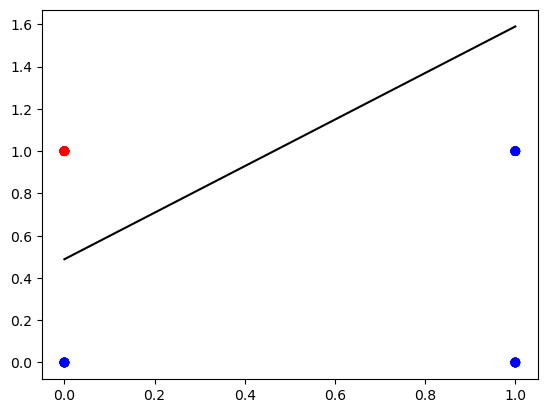

In [14]:
def plot_decision_boundary(X, Y, parameters):
    W = parameters["W"]
    b = parameters["b"]

    fig, ax = plt.subplots()
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']));
    
    x_line = np.arange(np.min(X[0,:]),np.max(X[0,:])*1.1, 0.1)
    ax.plot(x_line, - W[0,0] / W[0,1] * x_line + -b[0,0] / W[0,1] , color="black")
    plt.plot()
    plt.show()
    
plot_decision_boundary(X, Y, parameters)

And make some predictions:

In [15]:
def predict(X, parameters):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (blue: False / red: True)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A = forward_propagation(X, parameters)
    predictions = A > 0.5
    
    return predictions

X_pred = np.array([[1, 1, 0, 0],
                   [0, 1, 0, 1]])
Y_pred = predict(X_pred, parameters)

print(f"Coordinates (in the columns):\n{X_pred}")
print(f"Predictions:\n{Y_pred}")

Coordinates (in the columns):
[[1 1 0 0]
 [0 1 0 1]]
Predictions:
[[False False False  True]]


Pretty good for such a simple neural network!

<a name='4'></a>
## 4 - Performance on a Larger Dataset

Construct a larger and more complex dataset with the function `make_blobs` from the `sklearn.datasets` library:

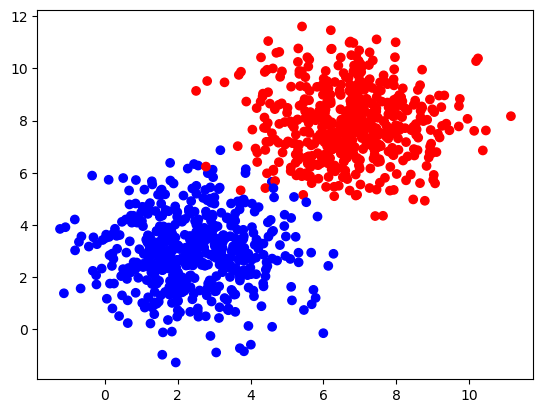

In [16]:
# Dataset
n_samples = 1000
samples, labels = make_blobs(n_samples=n_samples, 
                             centers=([2.5, 3], [6.7, 7.9]), 
                             cluster_std=1.4,
                             random_state=0)

X_larger = np.transpose(samples)
Y_larger = labels.reshape((1,n_samples))

plt.scatter(X_larger[0, :], X_larger[1, :], c=Y_larger, cmap=colors.ListedColormap(['blue', 'red']));

And train your neural network for $100$ iterations.

In [17]:
parameters_larger = nn_model(X_larger, Y_larger, num_iterations=100, learning_rate=1.2, print_cost=False)
print("W = " + str(parameters_larger["W"]))
print("b = " + str(parameters_larger["b"]))

W = [[1.01643208 1.13651775]]
b = [[-10.65346577]]


Plot the decision boundary:

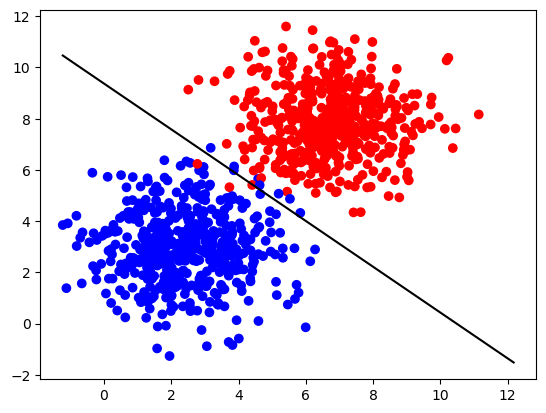

In [18]:
plot_decision_boundary(X_larger, Y_larger, parameters_larger)

Try to change values of the parameters `num_iterations` and `learning_rate` and see if the results will be different.

Congrats on finishing the lab!